# Continuation of previous exercise 1b

In [26]:
# Step 1: Import Packages and Classes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [27]:
# Step 2: Feed in the Data
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([15,11,2,8,25,32])

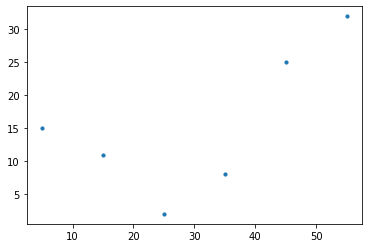

In [28]:
#plotting a graph to understand the points and need for a polynomial regression
plt.scatter(x, y, s=10)
plt.show()

In [36]:
#new step is transformation with the degree of the polynomial observed to fit the data

#global variable to change degree:
poly_degree=1

#from above we have an idea that a polynomial of degree 2 will fit the data
#include_bias true
x_transform = PolynomialFeatures(degree=poly_degree, include_bias=True).fit_transform(x)
print (x_transform.shape)
print (x_transform)

#first column: bias
#second: value of x
#third: value of x^2 (degree:2)

(6, 2)
[[ 1.  5.]
 [ 1. 15.]
 [ 1. 25.]
 [ 1. 35.]
 [ 1. 45.]
 [ 1. 55.]]


In [37]:
print(y.shape)
print(y)

(6,)
[15 11  2  8 25 32]


In [38]:
# Step 3: Create the model and fit the data
model = LinearRegression(fit_intercept=False).fit(x_transform,y)

In [39]:
# Step 4: Results
r_sq = model.score(x_transform,y)
print("Coefficient of determination: ", r_sq)
#the coefficient of determination measures how well a statistical model predicts an outcome.

print("Intercept, θ0: ",model.intercept_)
print("Slope, θ1: ", model.coef_)

Coefficient of determination:  0.4065969428801288
Intercept, θ0:  0.0
Slope, θ1:  [4.1  0.38]


In [40]:
# Step 5: Make Prediction
y_pred = model.predict(x_transform)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 6.   9.8 13.6 17.4 21.2 25. ]


In [41]:
#new predictions
x_new_input = np.array([-25, -5, 5, 60, 65, 70, 85, 90]).reshape((-1,1))
x_new_transform = PolynomialFeatures(degree=poly_degree, include_bias=True).fit_transform(x_new_input)
print(x_new_transform.shape)
print(x_new_transform)
y_pred_new = model.predict(x_new_transform)
print('New predicted response (y_pred_new):', y_pred_new,sep='\n')

#first column: bias
#second: value of x
#third: value of x^2 (degree:2)

(8, 2)
[[  1. -25.]
 [  1.  -5.]
 [  1.   5.]
 [  1.  60.]
 [  1.  65.]
 [  1.  70.]
 [  1.  85.]
 [  1.  90.]]
New predicted response (y_pred_new):
[-5.4  2.2  6.  26.9 28.8 30.7 36.4 38.3]


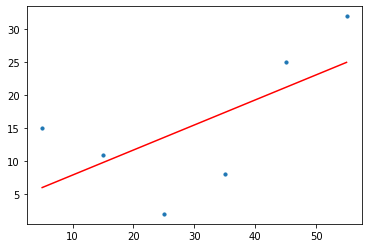

In [42]:
# Step 6: Visualisation

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

# Change degree with poly_degree

### Degree=10

At degree 10, we have a polynomial that goes through all the points.
We might think that this is very accurate with a coeffecient of determination: 0.9999999980397326
This is not true!

If you want to make NEW predictions, it will not generalise / it will not make good predictions.
The model is OVERFITTING.
It has learnt the data too well. It goes through almost or all points.
Such a model has a high variance.

The way the model is going to make predictions on new data is not the most appropriate one as it has only learnt from the dataset.

### Degree=1

At degree 1, the model is UNDERFITTING. It means that the model has been created is not able to capture appropriate knowledge from the data.
The points are very far from the line.

This model is highly biased. When we are going to use this on NEW / unseen data, it will not generalise very well.
We will have inappropriate predictions.